<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/ornsteinuhlenbeck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelling & Analyzing Ornstein-Uhlenbeck Process**

**Simulating a stochastic differential equation**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Characteristics & Relevance of Ornstein-Uhlenbeck Process**

* Stochastic differential equations (SDEs) model dynamical systems that are subject to noise. 

* An Ornstein-Uhlenbeck process is a solution of the Langevin equation. This model describes the stochastic evolution of a particle in a fluid under the influence of friction. The particle's movement is due to collisions with the molecules of the fluid (diffusion). The difference with the Brownian motion is the presence of friction.

* The Ornstein-Uhlenbeck process is stationary, Gaussian, and Markov, which makes it a good candidate to represent stationary random noise.

* We will simulate this process with a numerical method called the Euler-Maruyama method. It is a simple generalization to SDEs of the Euler method for ODEs.

**Characteristics and Relevance for Residuals Analysis**

* A stationary process is a process that is ``statistically invariant under translations’’
* the Ornstein-Uhlenbeck process is stationary (Brownian motion is not)
* Look for stock returns devoid of explanatory factors, and analyze the corresponding residuals as stochastic processes. (e.g. mean reverting?)
* Can residuals be fitted to (increments of) OU processes or other MR processes?
If so, what is the typical correlation time-scale?
* Mean reversion days: how long does it take to converge (e.g. model distribution of days).

## **Create Ornstein-Uhlenbeck Process**

In [0]:
# Function parameters

sigma = 1.  # Standard deviation.
mu = 10.  # Mean.
tau = .05  # Time constant

# Simulation parameters

dt = .001  # Time step.
T = 1.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times

# Define renormalized variables (to avoid recomputing these constants at every time step)

sigma_bis = sigma * np.sqrt(2. / tau)
sqrtdt = np.sqrt(dt)

# Create a vector that will contain all successive values of our process during the simulation:
x = np.zeros(n)

simulate the process with the Euler-Maruyama method. It is really like the standard Euler method for ODEs, but with an extra stochastic term (which is just a scaled normal random variable). 

In [0]:
for i in range(n - 1):
    x[i + 1] = x[i] + dt * (-(x[i] - mu) / tau) + \
        sigma_bis * sqrtdt * np.random.randn()

Visualize

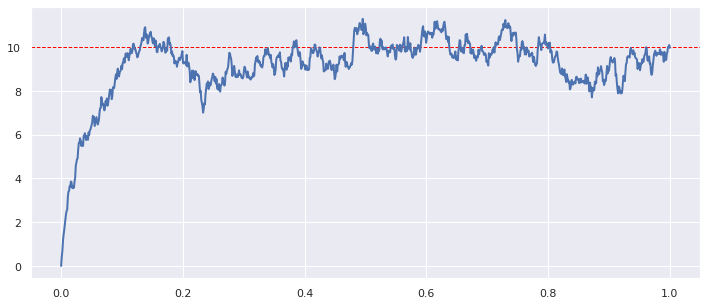

In [5]:
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.0})
fig, ax = plt.subplots(1, 1)
plt.axhline(y=10, color='red', linestyle='--', linewidth=1.0)
ax.plot(t, x, lw=2)

* Stationary and mean-reverting around mean=10 (red dotted line)
* In financial engineering: how long does it take in average to converge? mean-reversion is an investment opportunity!
* Now, we are going to take a look at the time evolution of the distribution of the process. To do this, we will simulate many independent realizations of the same process in a vectorized way. We define a vector X that will contain all realizations of the process at a given time (that is, we do not keep all realizations at all times in memory). This vector will be overwritten at every time step. We will show the estimated distribution (histograms) at several points in time:

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


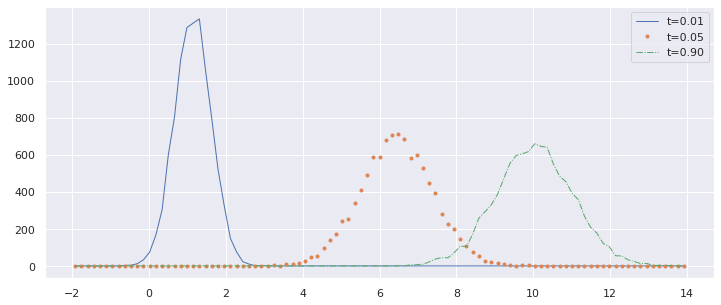

In [0]:
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.0})

ntrials = 10000
X = np.zeros(ntrials)
# We create bins for the histograms.
bins = np.linspace(-2., 14., 100)
fig, ax = plt.subplots(1, 1)
for i in range(n):
    # We update the process independently for
    # all trials
    X += dt * (-(X - mu) / tau) + \
        sigma_bis * sqrtdt * np.random.randn(ntrials)
    # We display the histogram for a few points in
    # time
    if i in (5, 50, 900):
        hist, _ = np.histogram(X, bins=bins)
        ax.plot((bins[1:] + bins[:-1]) / 2, hist,
                {5: '-', 50: '.', 900: '-.', }[i],
                label=f"t={i * dt:.2f}")
    ax.legend()

The distribution of the process tends to a Gaussian distribution with mean μ=10 and standard deviation σ=1. The process would be stationary if the initial distribution was also a Gaussian with the adequate parameters.

The Langevin equation that we use in this recipe is the following stochastic differential equation:

>$d x=-\frac{(x-\mu)}{\tau} d t+\sigma \sqrt{\frac{2}{\tau}} d W$

https://ipython-books.github.io/134-simulating-a-stochastic-differential-equation/